In [129]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\andre\Desktop\Machine Learning\MedicalCost\MedicalCost\insurance.csv")



In [130]:
!pip install hvplot

In [131]:
import hvplot.pandas
import seaborn as sbn
import matplotlib.pyplot as plt

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [133]:
data.info()
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [134]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
data_dummy = pd.get_dummies(data,drop_first = True)
data_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


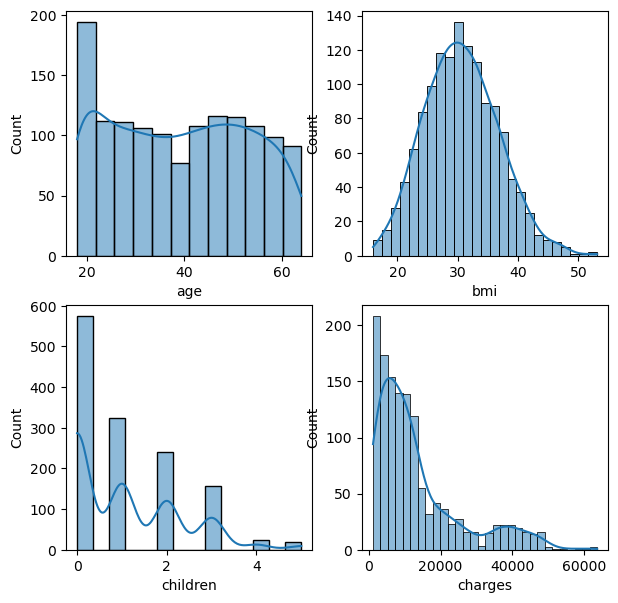

In [136]:
columns = ['age','bmi','children','charges']
plt.figure(figsize=(7,7))
for id,col in enumerate(columns):
    plt.subplot(2,2,id+1)
    sbn.histplot(data_dummy[col],kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

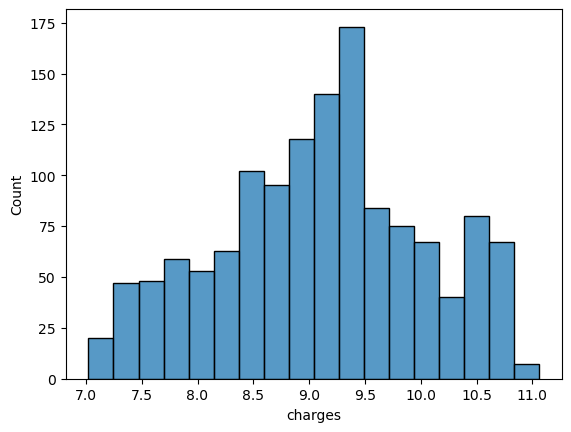

In [137]:
sbn.histplot(np.log(data_dummy['charges']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


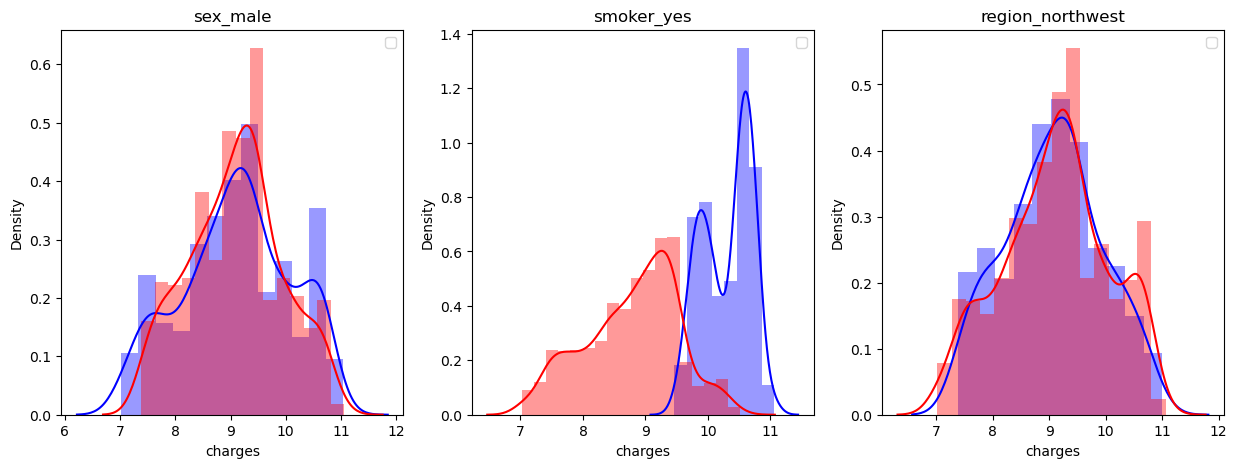

In [138]:
dummy_col = data_dummy.loc[:,data_dummy.dtypes == 'uint8'].columns
plt.figure(figsize=(15,5))
for id,col in enumerate(dummy_col[:3]):
    plt.subplot(1,3,id+1)
    sbn.distplot(np.log(data_dummy[(data_dummy[col] == 1)]['charges']),color='b')
    sbn.distplot(np.log(data_dummy[(data_dummy[col] == 0)]['charges']),color='r')
    plt.title(col)
    plt.legend()
import warnings
warnings.filterwarnings('ignore')

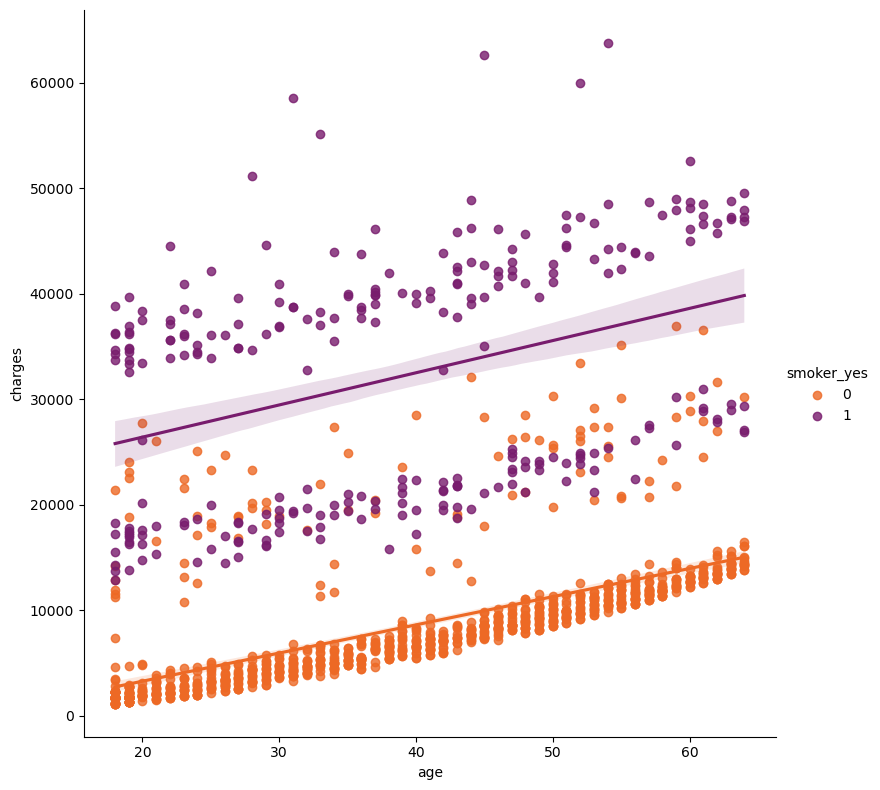

In [139]:
sbn.lmplot(x="age", y="charges", hue="smoker_yes", data=data_dummy, palette = 'inferno_r',height=8)

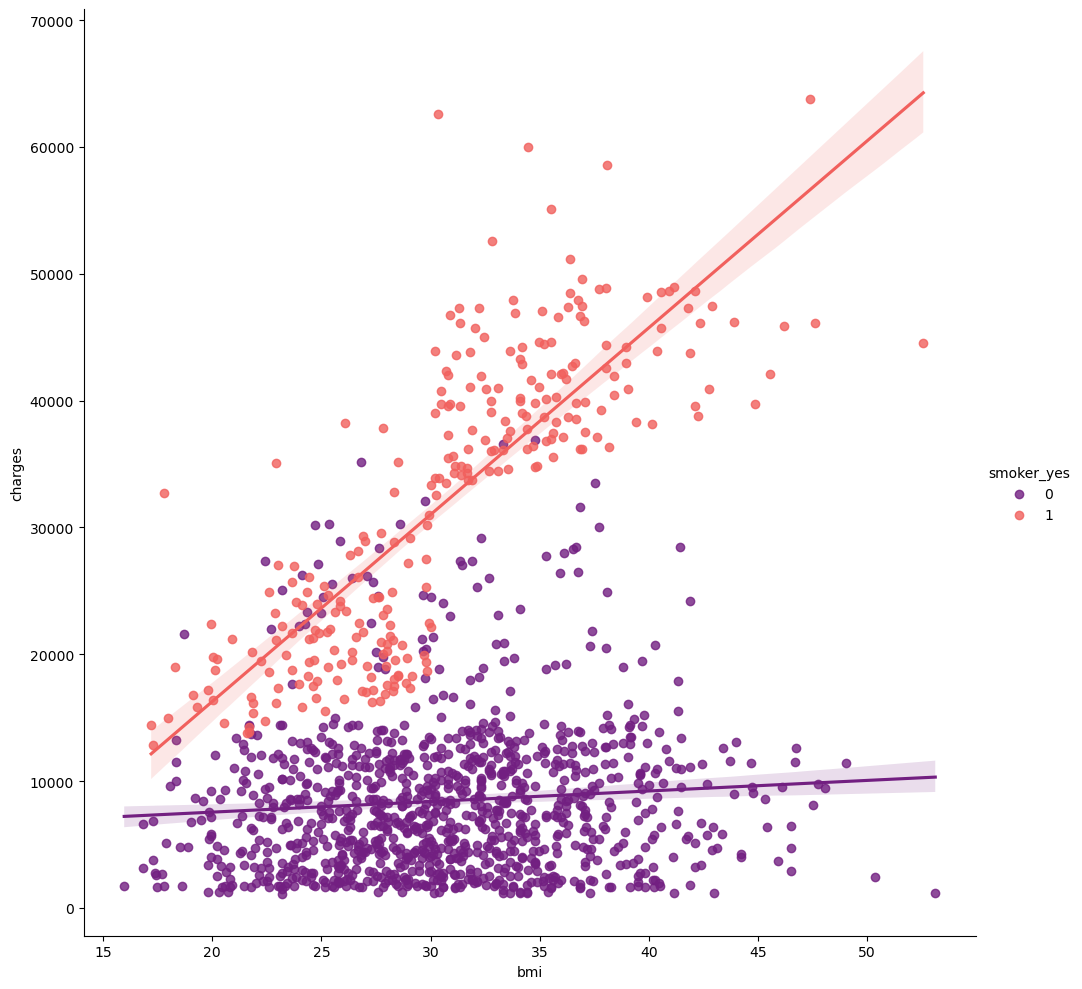

In [140]:
sbn.lmplot(x="bmi", y="charges", hue="smoker_yes", data=data_dummy, palette = 'magma', height = 10)

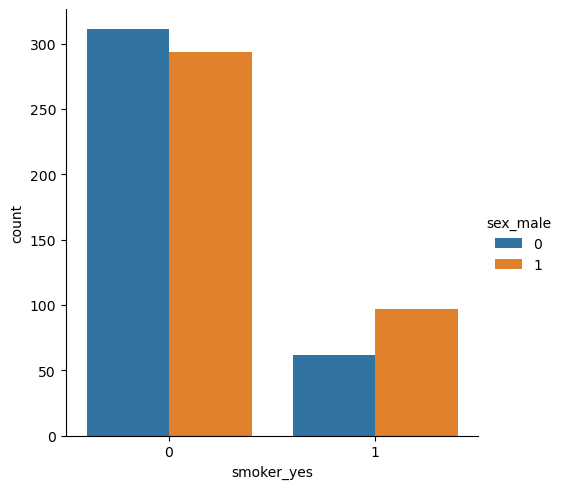

In [141]:
sbn.catplot(x="smoker_yes", 
            kind="count", 
            hue = "sex_male", 
            data=data_dummy[(data_dummy.children > 0)])

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [143]:
data = pd.get_dummies(data, columns=['sex', 'smoker'])

X = data.drop(['charges', 'region'], axis=1)
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R^2: ",r2)

R^2:  0.7181467437862109


In [144]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)


R^2 score: 0.7811302113434095


R-squared score: 0.8584
Mean squared error: 21988696.5889


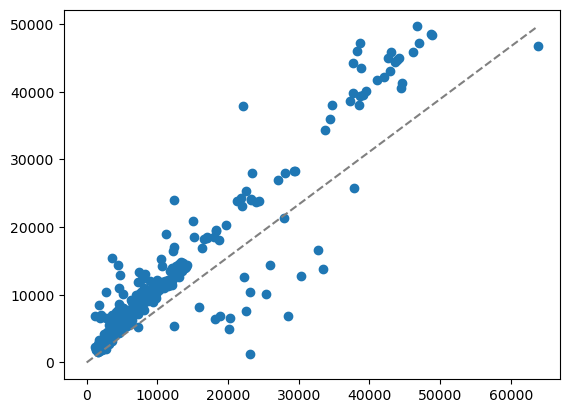

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using R-squared and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)], linestyle='--', color='gray')
plt.show()

R-squared score: 0.8512448472697803
Mean squared error: 23094048.764231626


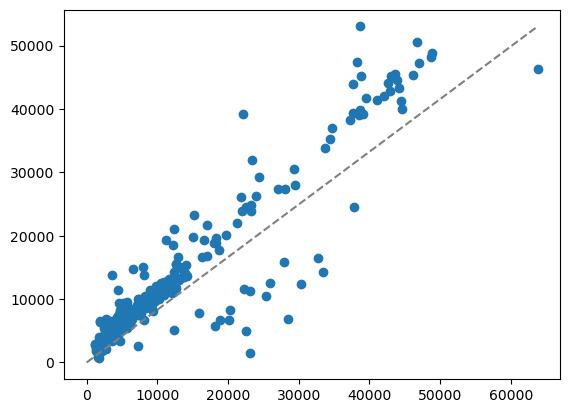

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

r2_score = gbr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score:", r2_score)
print("Mean squared error:", mse)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)], linestyle='--', color='gray')
plt.show()